# Przewidywanie rezygnacji ze studiów 

## Autorzy projektu
- Oktawian Kausz (*217601*)
- Izabela Kołodziejska (*217260*)
- **Piotr Kula (*217302*)**
- Kamil Marszałek (*217241*)

## Streszczenie

Za pomocą metod machine learning klasyfikujemy studentów do poszczególnej kategorii: porzucenie studiów lub sukcesywne ukończenie szkoły. 
Do analizy wykorzystywane są czynniki ekonomiczne, demograficzne i socjologiczne. 

## Słowa kluczowe


...

## Wprowadzenie 

Rezygnowanie ze studiów to obecnie powszechne zjawisko, które niesie za sobą szereg różnych konsekwencji. W celu zniwelowania ryzyka porzucenia akademickiej nauki przez studenta warto przeanalizować jakie czynniki skłaniają do podjęcia takiej decyzji. Dzięki trafnemu przewidywaniu który uczeń porzuci studia akademickie instytucje mogą podjąć odpowiednie środki zapobiegawcze. 

### Przedmiot badania
Przedmiotem badania są studenci różnych kierunków wraz z informacjami na ich temat takimi jak ich pochodzenie, wiek, płeć i inne

### Cel i zakres badania

Celem badania jest przewidzenie, czy danych student zrezygnuje ze studiów czy nie. Użyjemu klasyfikacji za pomocą metody takiej i takiej

## Import odpowiednich bibliotek

In [490]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Przegląd danych

### Import danych

In [491]:
data = pd.read_csv("data.csv", sep = ';')
df = pd.DataFrame(data)

### Przegląd danych

In [492]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.00,1,19,12,5,9,127.30,1,0,0,1,1,0,20,0,0,0,0,0,0.00,0,0,0,0,0,0.00,0,10.80,1.40,1.74,Dropout
1,1,15,1,9254,1,1,160.00,1,1,3,3,3,142.50,1,0,0,0,1,0,19,0,0,6,6,6,14.00,0,0,6,6,6,13.67,0,13.90,-0.30,0.79,Graduate
2,1,1,5,9070,1,1,122.00,1,37,37,9,9,124.80,1,0,0,0,1,0,19,0,0,6,0,0,0.00,0,0,6,0,0,0.00,0,10.80,1.40,1.74,Dropout
3,1,17,2,9773,1,1,122.00,1,38,37,5,3,119.60,1,0,0,1,0,0,20,0,0,6,8,6,13.43,0,0,6,10,5,12.40,0,9.40,-0.80,-3.12,Graduate
4,2,39,1,8014,0,1,100.00,1,37,38,9,9,141.50,0,0,0,1,0,0,45,0,0,6,9,5,12.33,0,0,6,6,6,13.00,0,13.90,-0.30,0.79,Graduate


In [493]:
print("Liczba wierszy:", data.shape[0])
print("Liczba kolumn:", data.shape[1])

Liczba wierszy: 4424
Liczba kolumn: 37


In [494]:
# Definicja kolumn i ich opisów
columns_data = pd.read_csv("data_description.csv")
columns_df = pd.DataFrame(columns_data)
pd.set_option('display.max_colwidth', None)
columns_df

,Column,Opis,Wartości
0,Marital status,Stan cywilny,1 – kawaler 2 – żonaty 3 – wdowiec 4 – rozwiedziony 5 – związek faktyczny 6 – formalnie rozdzielony
1,Application mode,Tryb aplikacji,"1 - pierwsza faza - kontyngent ogólny 2 - Rozporządzenie nr 612/93 5 - pierwsza faza - kontyngent specjalny (Wyspy Azorów) 7 - Posiadacze innych kursów wyższych 10 - Rozporządzenie nr 854-B/99 15 - Student międzynarodowy (licencjat) 16 - pierwsza faza - kontyngent specjalny (Wyspa Madera) 17 - druga faza - kontyngent ogólny 18 - trzecia faza - kontyngent ogólny 26 - Rozporządzenie nr 533-A/99, pkt b2) (Inny plan) 27 - Rozporządzenie nr 533-A/99, pkt b3 (Inna instytucja) 39 - Ponad 23 lata 42 - Przeniesienie 43 - Zmiana kursu 44 - Absolwenci specjalizacji technologicznej 51 - Zmiana instytucji/kursu 53 - Absolwenci dyplomu krótkiego cyklu 57 - Zmiana instytucji/kursu (Międzynarodowe)"
2,Application order,Kolejność aplikacji,Kolejność aplikacji (od 0 - pierwszy wybór; do 9 ostatni wybór)
3,Course,Kierunek studiów,33 - Technologie produkcji biopaliw 171 - Projektowanie i projektowanie multimediów 8014 - Usługi społeczne (uczestnictwo wieczorne) 9003 - Agronomia 9070 - Projektowanie komunikacji 9085 - Pielęgniarstwo weterynaryjne 9119 - Inżynieria informatyczna 9130 - Końszczyzna 9147 - Zarządzanie 9238 - Usługi społeczne 9254 - Turystyka 9500 - Pielęgniarstwo 9556 - Higiena jamy ustnej 9670 - Zarządzanie reklamą i marketingiem 9773 - Dziennikarstwo i komunikacja 9853 - Edukacja podstawowa 9991 - Zarządzanie (uczestnictwo wieczorne)
4,Daytime/evening attendance,Obecność (dzienna/wieczorowa),1 – dzienny 0 - wieczorny
5,Previous qualification,Poprzednie kwalifikacje,1 - Wykształcenie średnie 2 - Wyższe wykształcenie - licencjat 3 - Wyższe wykształcenie - stopień 4 - Wyższe wykształcenie - magister 5 - Wyższe wykształcenie - doktorat 6 - Częstotliwość wyższego wykształcenia 9 - 12 rok szkolny - nieukończony 10 - 11 rok szkolny - nieukończony 12 - Inny - 11 rok szkolny 14 - 10 rok szkolny 15 - 10 rok szkolny - nieukończony 19 - Podstawowe wykształcenie 3. cykl (9./10./11. rok) lub równorzędne 38 - Kurs specjalizacji technologicznej 40 - Wyższe wykształcenie - stopień (1. cykl) 42 - Profesjonalny kurs techniczny wyższej uczelni 43 - Wyższe wykształcenie - magister (2. cykl)
6,Previous qualification (grade),Poprzednia kwalifikacja (ocena),Ocena poprzedniej kwalifikacji (między 0 a 200)
7,Nationality,Narodowość,1 - Portugalski; 2 - Niemiecki; 6 - Hiszpański; 11 - Włoski; 13 - Holenderski; 14 - Angielski; 17 - Litewski; 21 - Angolski; 22 - Zielonoświątkowy; 24 - Gwinejski; 25 - Mozambicki; 26 - Santomean; 32 - Turecki; 41 - Brazylijski; 62 - Rumuński; 100 - Mołdawia (Republika); 101 - Meksykański; 103 - Ukraiński; 105 - Rosyjski; 108 - Kubański; 109 - Kolumbijski
8,Mother's qualification,Kwalifikacje matki,1 - Wykształcenie średnie - 12 rok szkolny lub równowartość 2 - Wyższe wykształcenie - licencjat 3 - Wyższe wykształcenie - stopień 4 - Wyższe wykształcenie - magister 5 - Wyższe wykształcenie - doktorat 6 - Częstotliwość wyższego wykształcenia 9 - 12 rok szkolny - nieukończony 10 - 11 rok szkolny - nieukończony 11 - 7 rok (Stary) 12 - Inny - 11 rok szkolny 14 - 10 rok szkolny 18 - Kurs ogólny handlu 19 - Podstawowe wykształcenie 3. cykl (9./10./11. rok) lub równorzędne 22 - Techniczny kurs zawodowy 26 - 7 rok szkolny 27 - 2 cykl ogólnego kursu średniego szkolnictwa 29 - 9 rok szkolny - nieukończony 30 - 8 rok szkolny 34 - Nieznany 35 - Nie umie czytać ani pisać 36 - Może czytać bez ukończenia 4 roku szkolnego 37 - Podstawowe wykształcenie 1. cykl (4./5. rok) lub równorzędne 38 - Podstawowe wykształcenie 2. cykl (6./7./8. rok) lub równorzędne 39 - Kurs specjalizacji technologicznej 40 - Wyższe wykształcenie - stopień (1. cykl) 41 - Kurs specjalistycznych studiów wyższych 42 - Profesjonalny kurs techniczny wyższej uczelni 43 - Wyższe wykształcenie - magister (2. cykl) 44 - Wyższe wykształcenie - doktorat (3. cykl)
9,Father's qualification,Kwalifikacje oj

## Przygotowanie danych do analizy

### Duplikaty


In [495]:
print(f"Liczba duplikatów w danych : {data.duplicated().sum()}")

Liczba duplikatów w danych : 0


### Braki danych

In [496]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

W zbiorze danych nie ma brakujących wartości

Nasz zbiór danych spełnia warunki zbioru z kryteriów projektu, ponieważ zawiera conajmniej 10 cech i minimum 800 obserwacji. Nie zawiera również duplikatów, brakujący danych zatem nie ma potrzeby ich usuwania. 

## Wstępna analiza danych

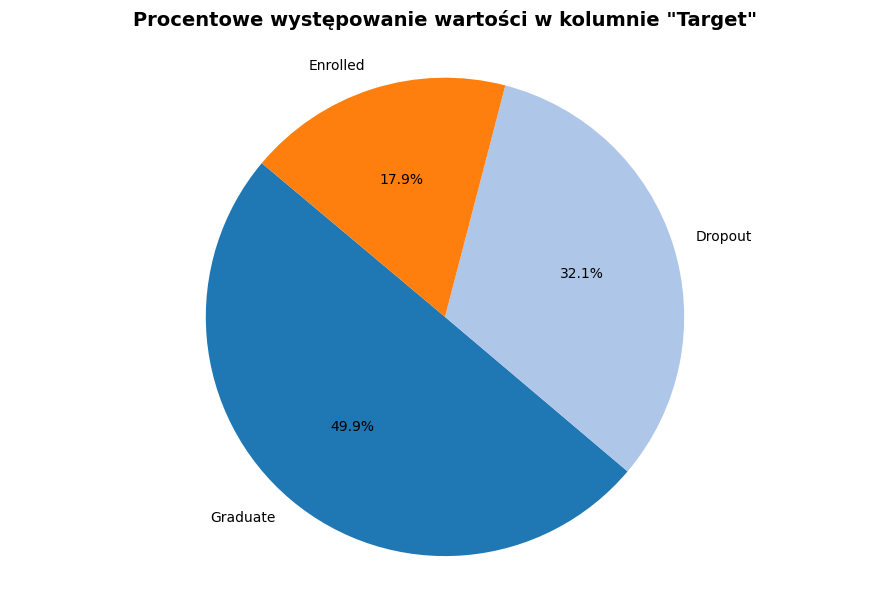

In [497]:
target_counts = df['Target'].value_counts(normalize=True) * 100

plt.figure(figsize=(9, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Procentowe występowanie wartości w kolumnie "Target"', fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

Jak można zauważyć na wykresie, niemalże połowa badanych studentów ukończyła z powodzeniem kurs. Około 20% badanych jest w trakcie trwania kursu a 30% nie udało się dokończyć rozpoczętego szkolenia.

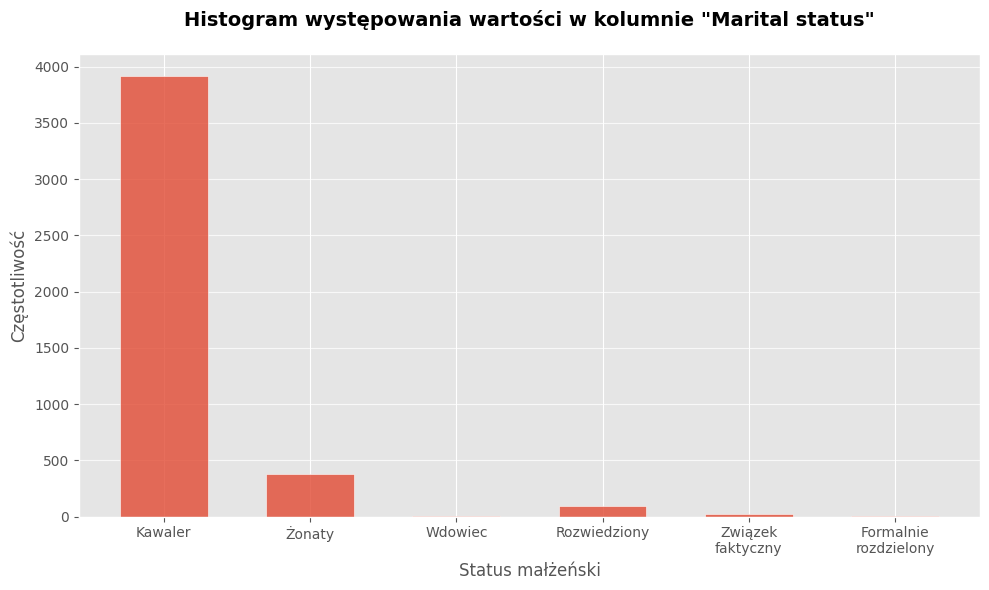

In [498]:
marital_status = df['Marital status']
labels = ['Kawaler', 'Żonaty', 'Wdowiec', 'Rozwiedziony', 'Związek faktyczny', 'Formalnie rozdzielony']
wrapped_labels = ['\n'.join(wrap(label, 12)) for label in labels]

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(marital_status, bins=range(1, 8), edgecolor='white', alpha=0.8, align='mid', rwidth=0.6)

plt.title('Histogram występowania wartości w kolumnie "Marital status"', fontsize=14, fontweight='bold', pad=20)  # Dodanie fontweight
plt.xlabel('Status małżeński', fontsize=12)
plt.ylabel('Częstotliwość', fontsize=12)

plt.xticks(ticks=[i + 0.5 for i in range(1, 7)], labels=wrapped_labels, rotation=0, ha='center')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


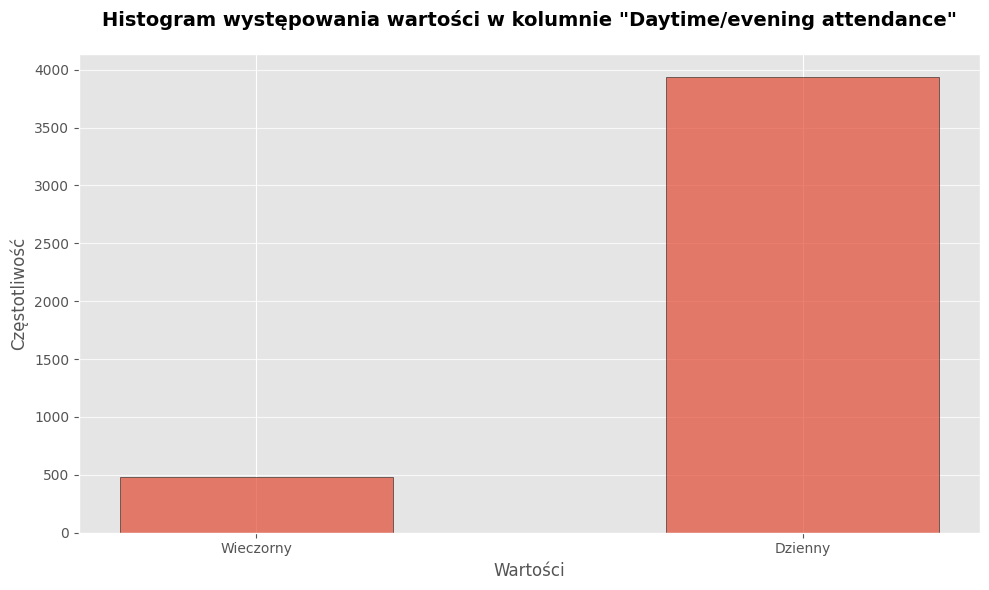

In [499]:
attendance = df['Daytime/evening attendance\t']

plt.figure(figsize=(10, 6))
plt.hist(attendance, bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7, align='mid', rwidth=0.5)  # zmniejszenie szerokości kolumn
plt.title('Histogram występowania wartości w kolumnie "Daytime/evening attendance"', fontweight='bold', fontsize=14, pad=20)
plt.xlabel('Wartości', fontsize=12)
plt.ylabel('Częstotliwość', fontsize=12)

plt.xticks([0, 1], ['Wieczorny', 'Dzienny'])
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

plt.show()

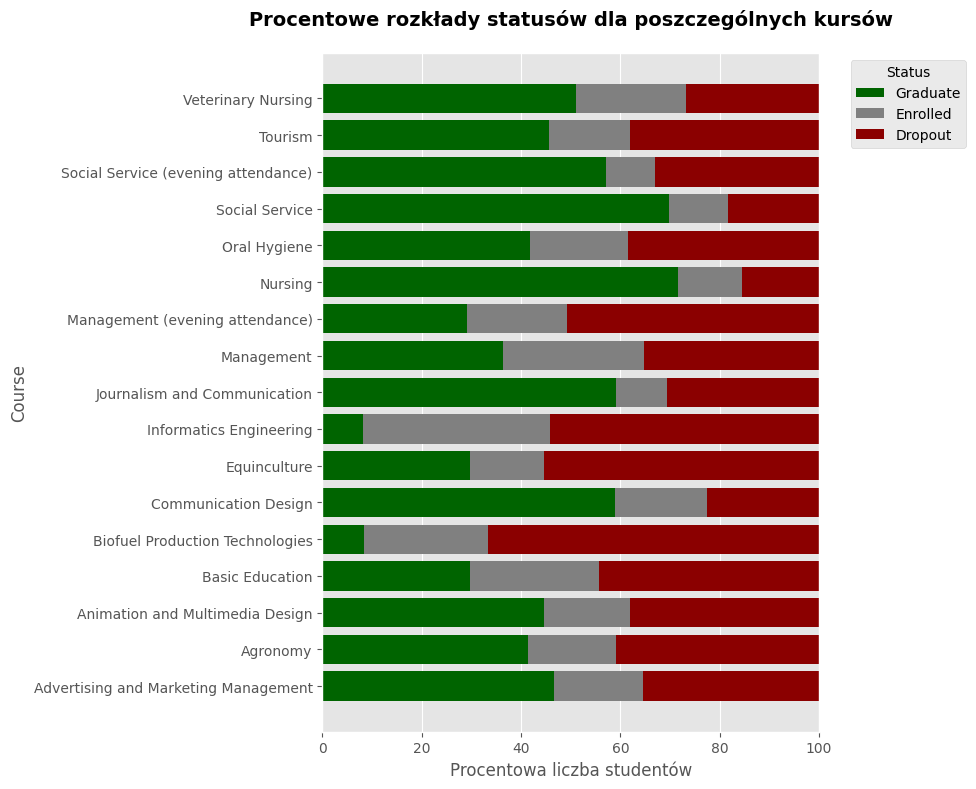

In [500]:
course_names = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

df['Course'] = df['Course'].map(course_names)
grouped = df.groupby('Course')['Target'].value_counts(normalize=True).unstack(fill_value=0) * 100
fig, ax = plt.subplots(figsize=(10, 8))
colors = {'Graduate': 'darkgreen', 'Enrolled': 'grey', 'Dropout': 'darkred'}
bottom = pd.Series(data=[0]*len(grouped), index=grouped.index)

for status in ['Graduate', 'Enrolled', 'Dropout']:
    plt.barh(grouped.index, grouped[status], color=colors[status], label=status, left=bottom)
    bottom += grouped[status]

plt.title('Procentowe rozkłady statusów dla poszczególnych kursów', fontweight='bold', fontsize=14, pad=20)
plt.xlabel('Procentowa liczba studentów')
plt.ylabel('Course')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


## Boxploty - czyli analiza obserwacji odstających

### Wyciągam najpierw tylko dane zmiennoprzecinkowe

In [501]:
# Dane zmiennoprzecinkowe
data_num = data.select_dtypes(include=['float64'])
data_num.columns



Index(['Previous qualification (grade)', 'Admission grade',
       'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
       'Unemployment rate', 'Inflation rate', 'GDP'],
      dtype='object')

# DODAĆ wykresy tu

In [502]:
from sklearn.preprocessing import LabelEncoder

# Inicjalizacja LabelEncoder
le = LabelEncoder()

# Zamiana wartości w kolumnie 'Target' na wartości liczbowe
df['Target'] = le.fit_transform(df['Target'])


In [503]:
# Prezentacja danych zmiennoprzecinkowych
data_num.describe()

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,132.61,126.98,10.64,10.23,11.57,1.23,0.00
std,13.19,14.48,4.84,5.21,2.66,1.38,2.27
min,95.00,95.00,0.00,0.00,7.60,-0.80,-4.06
25%,125.00,117.90,11.00,10.75,9.40,0.30,-1.70
50%,133.10,126.10,12.29,12.20,11.10,1.40,0.32
75%,140.00,134.80,13.40,13.33,13.90,2.60,1.79
max,190.00,190.00,18.88,18.57,16.20,3.70,3.51


Odrzucenie wartości odstających:

In [504]:
data_num = data.select_dtypes(include=['float64']).columns.tolist()

df_cleaned = data.copy()

for i in data_num:
    Q1 = df_cleaned[i].quantile(0.25)
    Q3 = df_cleaned[i].quantile(0.75)
    IQR = Q3 - Q1
    condition = (df_cleaned[i] >= Q1 - 3 * IQR) & (df_cleaned[i] <= Q3 + 3 * IQR)
    df_cleaned = df_cleaned[condition]

# Dane po odrzuceniu wartości odstających
df_cleaned = df_cleaned[data_num]

df_cleaned.describe()


,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
count,3509.00,3509.00,3509.00,3509.00,3509.00,3509.00,3509.00
mean,132.60,127.08,12.75,12.75,11.55,1.21,0.06
std,12.98,13.77,1.33,1.37,2.64,1.37,2.27
min,95.00,95.00,10.00,10.00,7.60,-0.80,-4.06
25%,124.00,118.40,11.80,11.75,9.40,0.30,-1.70
50%,133.00,126.30,12.67,12.67,11.10,1.40,0.32
75%,140.00,134.50,13.60,13.67,13.90,2.60,1.79
max,184.40,184.40,18.88,18.57,16.20,3.70,3.51


# * **narysuj tutaj boxploty** *


## Wybrane modele do klasyfikacji

wybrać z:

Na podstawie zbioru uczącego wyznaczamy klasyfikator
- LDA,
- QDA, 
- Fihera, 
- **Naive Bayes**, 
- **metoda najbliższego sąsiada**, 
- **SVM**,
- **drzewa klasyfikacyjne**, 
- **lasy losowe**, 
- **sieci neuronowe**, 
- wzmacnianie
- klasyfikatorów Boosting

Ocena skuteczności działania klasyfikatora 
- ocena wartości błędu klasyfikacji lub trafności klasyfikacji: 
  - metody kroswalidacji, 
  - krzywa ROC, 
  - AUC, 
  - macierz pomyłek (confusion matrix), 
  - mierniki klasyfikacji:
    - czułość, 
    - specyficzność, 
    - precyzja, 
    - F1-score